# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

There is an increasing education gap between the rich and poor [(source)](https://www.forbes.com/sites/nickmorrison/2019/12/17/higher-education-gap-between-rich-and-poor-reaches-10-year-high/?sh=2cc772f9749a) . The primary aim of this project is to help educational institutes and governments with resource and policy planning, to make education more accessible and equitable. It will analyze if the income gap has an effect on standardized testing, by examining the state of California as it is one of the more populous states. 

-----
### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
-----

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

The datasets chosen are 
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [California Census](https://en.wikipedia.org/wiki/List_of_California_locations_by_income) : 2014 Income and population information by county

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
list_nums = [1, 2, 4, 5, 7, 2, 3, 6]


def mean_calc(list_input):
    result = sum(list_input) / len(list_input)
    return result


mean_calc(list_nums)

3.75

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def stddev(list_input):
    mean = mean_calc(list_input)
    sum_list = [(x - mean) ** 2 for x in list_input]
    return ((sum(sum_list)) / len(list_input)) ** 0.5


stddev(list_nums)

1.984313483298443

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
list_percents = ["50%", "30.5%", "100%", "24.2%", "0%"]


def convert(inputs):
    converted_list = []
    for x in inputs:
        converted_list.append(float(x.strip("%")) / 100)
    for y in converted_list:
        converted_list[int(y)] = round(converted_list[int(y)], 3)
    return converted_list


convert(list_percents)

[0.5, 0.305, 1.0, 0.242, 0.0]

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as stats
import missingno as msno

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### Data Cleaning (I) - ACT Scores 2019 California

In [5]:
# import data set
act_df = pd.read_csv("data/act_2019_ca.csv")

# display first 5 rows & check types
display(act_df.head())
act_df.info()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

#### Removing unnecessary rows & columns
(Also checks for nulls!)

In [6]:
# 1. unnamed column of NANs
act_df.drop("Unnamed: 17", axis=1, inplace=True)
act_df.tail()

# 2. last row of NANs
act_df.drop((len(act_df) - 1), inplace=True)
act_df.tail()

# 3. first 4 columns - \
# they are number codes for school, county, district \
# which is also represented in readable text that does not make your eyes burn
act_df.drop(["CDS", "CCode", "CDCode", "SCode"], axis=1, inplace=True)

# 4. remove year column - does not help analysis since it is all the same from 2018-2019
act_df.drop(["Year"], axis=1, inplace=True)

# 5. remove RType = 'X' - aggregate for entire California (which will skew data)
act_df.drop(act_df[act_df["RType"] == "X"].index, inplace=True)

In [7]:
act_df.head()

,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21
0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15
4,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89


#### Making data easier to read and analyze

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2308
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rtype       2308 non-null   object
 1   sname       1728 non-null   object
 2   dname       2250 non-null   object
 3   cname       2308 non-null   object
 4   enroll12    2308 non-null   int64 
 5   numtsttakr  2308 non-null   int64 
 6   avgscrread  1952 non-null   object
 7   avgscreng   1952 non-null   object
 8   avgscrmath  1952 non-null   object
 9   avgscrsci   1952 non-null   object
 10  numge21     1952 non-null   object
 11  pctge21     1952 non-null   object
dtypes: int64(2), object(10)
memory usage: 234.4+ KB

Out of 2308 rows, there are 356 missing test scores. This represents 15% of the data.


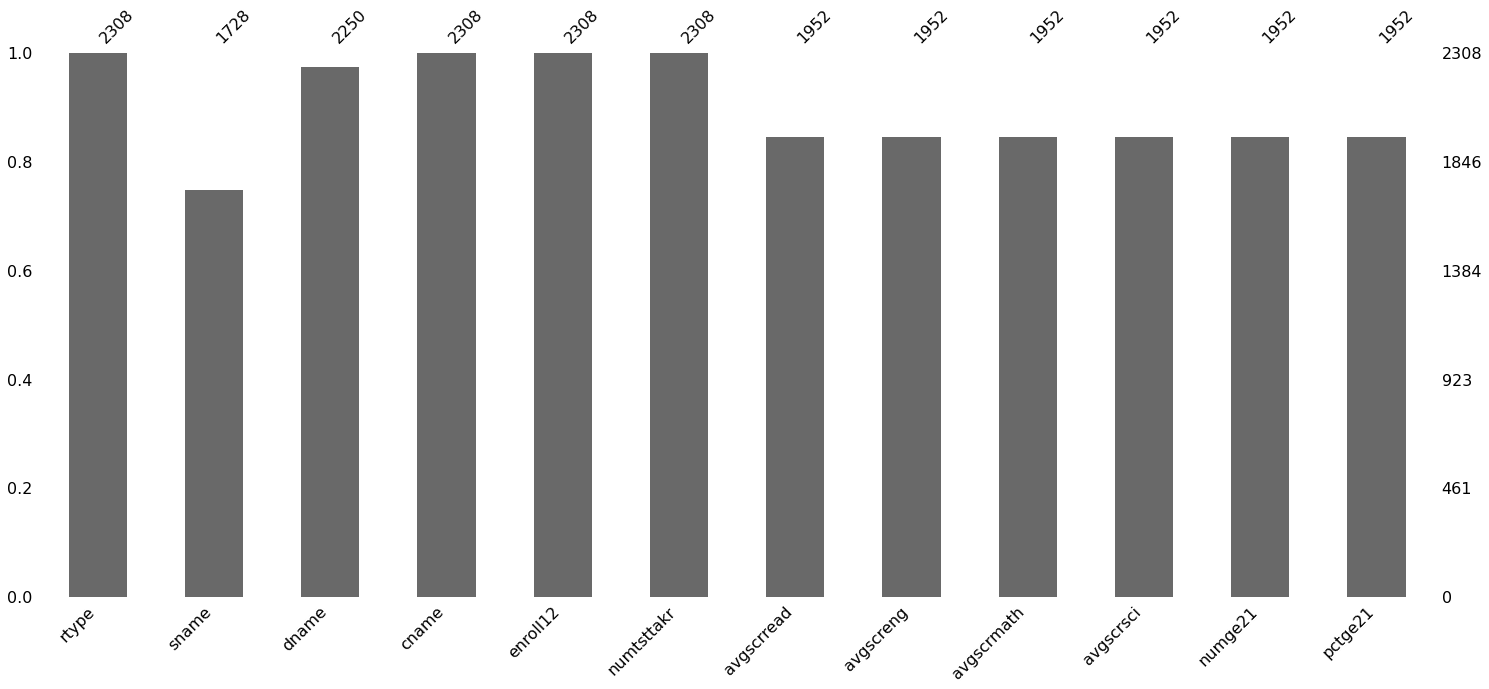

In [8]:
# rename columns to lowercase
act_df.columns = act_df.columns.str.lower()
act_df.head()

# display data types
# 1. convert necessary columns to int
dtypes = {"enroll12": "int64", "numtsttakr": "int64"}
act_df = act_df.astype(dtype=dtypes)
act_df.info()

# check number of null values
msno.bar(act_df.sample(2308))

print()
print(
    f"Out of 2308 rows, there are {2308-1952} missing test scores. This represents {round((2308-1952)/2308*100)}% of the data."
)

In [9]:
# filter county data only
act_df_county = act_df[act_df["rtype"] == "C"]

# note: null values are not deleted yet - as these may still have valuable information (seen later)

### Sanity Check for Data (By County)

Preliminary observations: 
1. These columns are not useful to us - rtype, sname, dname 
2. Total of 58 counties
3. filtering out avgscrread == NaN gives districts with 0 test takers
4. filtering out avgscrread == * gives districts with less than 15 test takers

In [10]:
act_df_county.shape

(58, 12)

In [11]:
# in the county of Alpine - there are 0 test takers
act_df_county[(act_df_county["avgscrread"].isnull())]

,rtype,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21
1103,C,NaN,NaN,Alpine,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# sierra, plumas and del norte have less than 15 test takers
act_df_county[(act_df_county['avgscrread']=='*')]

,rtype,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21
1076,C,NaN,NaN,Sierra,23,3,*,*,*,*,*,*
1100,C,NaN,NaN,Plumas,163,9,*,*,*,*,*,*
1105,C,NaN,NaN,Del Norte,363,5,*,*,*,*,*,*


#### Making the county dataframe more readable

In [13]:
# final list with no nulls and more than 15 test takers
final_act_df_county = (
    act_df_county[(act_df_county["avgscrread"] != "*")]
    .dropna(axis=0, subset=["avgscrread"])
    .drop(["rtype", "sname", "dname"], axis=1)
    .reset_index(drop=True)
)

# change data types
dtypes = {
    "enroll12": "int64",
    "numtsttakr": "int64",
    "avgscrread": "int16",
    "avgscreng": "int16",
    "avgscrmath": "int16",
    "avgscrsci": "int16",
    "numge21": "int64",
    "pctge21": "float64",
}
final_act_df_county = final_act_df_county.astype(dtype=dtypes)


# add column of participation rate
final_act_df_county["act_participationrate"] = (
    final_act_df_county["numtsttakr"] / final_act_df_county["enroll12"] * 100
)

# checking ACT test scores - are there any scores more than 36 points?
# 36 is the maximum number of points u can get for ACT


final_act_df_county["avgtotal"] = round(
    (
        final_act_df_county["avgscrread"]
        + final_act_df_county["avgscreng"]
        + final_act_df_county["avgscrmath"]
        + final_act_df_county["avgscrsci"]
    )
    / 4
)

# check if total >36
outofrange = final_act_df_county[(final_act_df_county["avgtotal"] >= 36)]
print(f"There are {outofrange.cname.sum()} scores out of range.")
print()


# final check on dataframe and data types
display(final_act_df_county.info())

display(final_act_df_county.head())

There are 0 scores out of range.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cname                  54 non-null     object 
 1   enroll12               54 non-null     int64  
 2   numtsttakr             54 non-null     int64  
 3   avgscrread             54 non-null     int16  
 4   avgscreng              54 non-null     int16  
 5   avgscrmath             54 non-null     int16  
 6   avgscrsci              54 non-null     int16  
 7   numge21                54 non-null     int64  
 8   pctge21                54 non-null     float64
 9   act_participationrate  54 non-null     float64
 10  avgtotal               54 non-null     float64
dtypes: float64(3), int16(4), int64(3), object(1)
memory usage: 3.5+ KB


None

,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21,act_participationrate,avgtotal
0,Sacramento,19540,3065,21,20,21,21,1526,49.79,15.685773,21.0
1,San Joaquin,11778,1348,22,21,21,21,693,51.41,11.445067,21.0
2,Kern,14229,1257,21,20,20,20,544,43.28,8.834071,20.0
3,Shasta,2161,173,26,24,24,24,131,75.72,8.005553,24.0
4,Sutter,1827,196,23,22,22,22,117,59.69,10.727969,22.0


In [14]:
# check if there are any repeat test takers

repeat_act_county = final_act_df_county[
    final_act_df_county["enroll12"] - final_act_df_county["numtsttakr"] < 0
]

print(f"There are {repeat_act_county.numge21.sum()} repeat test takers across counties.")

There are 0 repeat test takers across counties.


### Data Cleaning (II) - SAT Scores 2019 California

In [15]:
# import data set
sat_df = pd.read_csv("data/sat_2019_ca.csv")

# display first 5 rows
display(sat_df.head())
sat_df.info()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

#### Removing unnecessary rows & columns
(Also checks for nulls!)

In [16]:
# 1. unnamed column of NAN
sat_df.drop(labels="Unnamed: 25", axis=1, inplace=True)

# 2. last row of NANs
sat_df.drop((len(sat_df) - 1), inplace=True)
sat_df.tail()

# 3. first 4 columns & year not required
sat_df.drop(["CDS", "CCode", "CDCode", "SCode", "Year"], axis=1, inplace=True)

# 4. remove RType = 'X' - aggregate for entire California (which will skew data)
sat_df.drop(sat_df[sat_df["RType"] == "X"].index, inplace=True)

In [17]:
sat_df.head()

,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11
0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,*,*,*,*,26.0,6.0,*,*,*,*,*,*,*,*
2,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,219.0,174.0,42,24.14,12,6.90,14,13.73,11,6.32
3,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,333.0,275.0,97,35.27,37,13.45,18,15.93,35,12.73
4,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*,*,*,17.0,5.0,*,*,*,*,*,*,*,*


#### Making data easier to read and analyze

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 0 to 2578
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rtype         2578 non-null   object
 1   sname         1981 non-null   object
 2   dname         2520 non-null   object
 3   cname         2578 non-null   object
 4   enroll_12     2578 non-null   int64 
 5   testees_12    2578 non-null   int64 
 6   num_erw_12    2303 non-null   object
 7   pct_erw_12    2303 non-null   object
 8   num_math_12   2303 non-null   object
 9   pct_math_12   2303 non-null   object
 10  enroll_11     2578 non-null   int64 
 11  testees_11    2578 non-null   int64 
 12  num_erw_11    2268 non-null   object
 13  pct_erw_11    2268 non-null   object
 14  num_math_11   2268 non-null   object
 15  pct_math_11   2268 non-null   object
 16  total_num_12  2303 non-null   object
 17  total_pct_12  2303 non-null   object
 18  total_num_11  2268 non-null   object
 19  total_

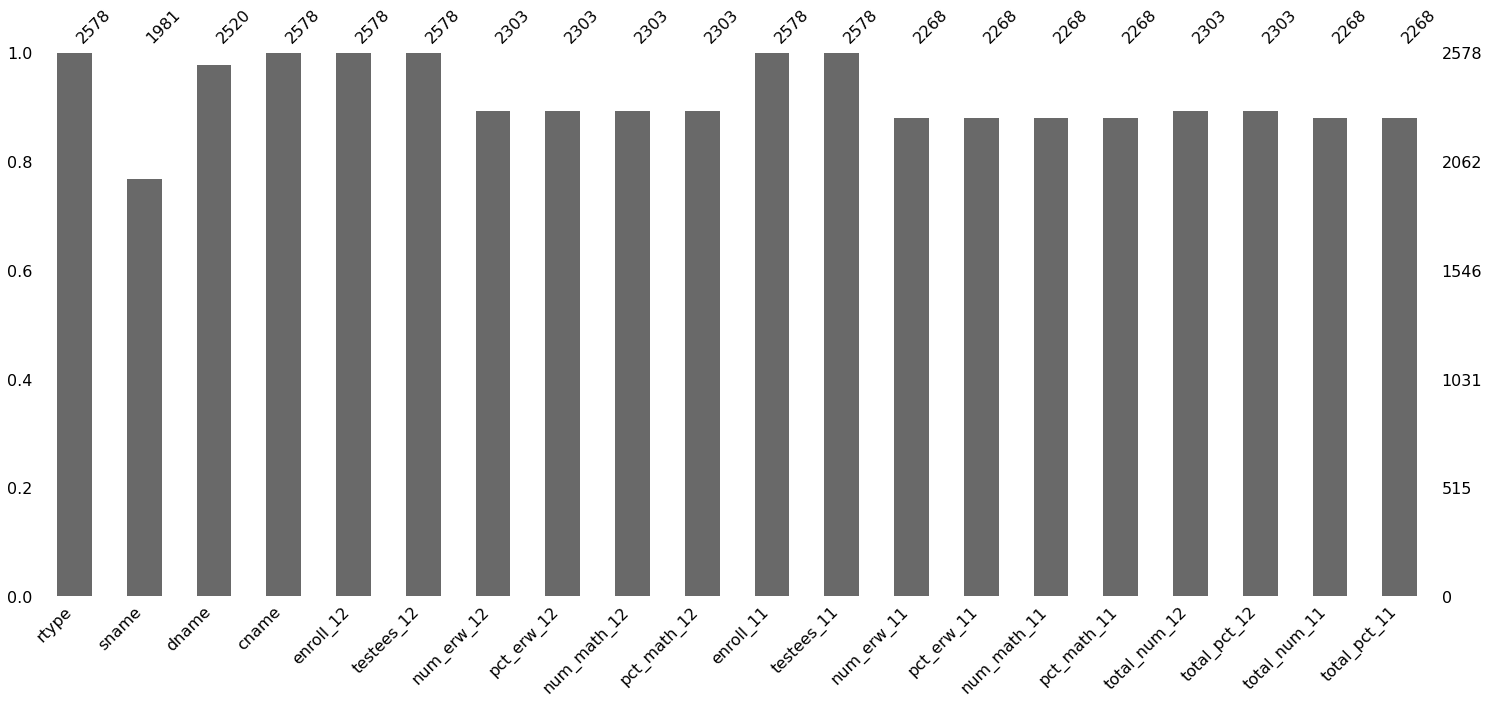

In [18]:
# rename columns + lower case
sat_df.rename(
    columns={
        "Enroll12": "enroll_12",
        "NumTSTTakr12": "testees_12",
        "NumERWBenchmark12": "num_erw_12",
        "PctERWBenchmark12": "pct_erw_12",
        "NumMathBenchmark12": "num_math_12",
        "PctMathBenchmark12": "pct_math_12",
        "Enroll11": "enroll_11",
        "NumTSTTakr11": "testees_11",
        "NumERWBenchmark11": "num_erw_11",
        "PctERWBenchmark11": "pct_erw_11",
        "NumMathBenchmark11": "num_math_11",
        "PctMathBenchmark11": "pct_math_11",
        "TotNumBothBenchmark12": "total_num_12",
        "PctBothBenchmark12": "total_pct_12",
        "TotNumBothBenchmark11": "total_num_11",
        "PctBothBenchmark11": "total_pct_11",
        "RType": "rtype",
        "SName": "sname",
        "DName": "dname",
        "CName": "cname",
    },
    inplace=True,
)

sat_df.head()

# display data types
# 1. convert necessary columns to int (further conversion once null values are removed)
dtypes = {
    "enroll_12": "int64",
    "testees_12": "int64",
    "enroll_11": "int64",
    "testees_11": "int64",
}
sat_df = sat_df.astype(dtype=dtypes)
sat_df.info()

# check number of null values
msno.bar(sat_df.sample(2578))

print() 
print(
    f"Out of 2308 rows, there are {2578-2268} missing test scores. This represents {round((2578-2268)/2578*100)}% of the data."
)

In [19]:
# filter county data only
sat_df_county = sat_df[sat_df["rtype"] == "C"]

# note: null values are not deleted yet - as these may still have valuable information (seen later)

### Sanity Check for Data (By County)

Preliminary observations: 
1. Same number of counties as act_df (good!)
2. Similarly, some columns can be removed (rtype, sname, dname)
3. Cannot simply drop NaN and *, as there are 2 categories of data. Instead, replace with 0 so it can be aggregated
    - year 11
    - year 12
4. This dataset does not contain raw scores, instead look at % over benchmarks

In [20]:
sat_df_county.head()

,rtype,sname,dname,cname,enroll_12,testees_12,num_erw_12,pct_erw_12,num_math_12,pct_math_12,enroll_11,testees_11,num_erw_11,pct_erw_11,num_math_11,pct_math_11,total_num_12,total_pct_12,total_num_11,total_pct_11
1981,C,NaN,NaN,El Dorado,2226,604,547,90.56,458,75.83,2201,713,667,93.55,636,89.20,442,73.18,619,86.82
1982,C,NaN,NaN,Los Angeles,114618,48676,30081,61.80,19791,40.66,111894,68275,39363,57.65,26064,38.18,18555,38.12,24602,36.03
1983,C,NaN,NaN,Madera,2352,442,277,62.67,136,30.77,2318,1290,608,47.13,316,24.50,127,28.73,293,22.71
1984,C,NaN,NaN,Yolo,2299,759,586,77.21,464,61.13,2320,798,709,88.85,605,75.81,443,58.37,591,74.06
1985,C,NaN,NaN,Kern,14229,3793,2334,61.53,1481,39.05,13967,2789,2077,74.47,1570,56.29,1364,35.96,1454,52.13


In [21]:
# same observation as ACT -> Alpine county has no test takers
sat_df_county[(sat_df_county["pct_math_12"].isnull())]

,rtype,sname,dname,cname,enroll_12,testees_12,num_erw_12,pct_erw_12,num_math_12,pct_math_12,enroll_11,testees_11,num_erw_11,pct_erw_11,num_math_11,pct_math_11,total_num_12,total_pct_12,total_num_11,total_pct_11
2012,C,NaN,NaN,Alpine,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# replace NaN and * with 0 to be able to cast to integer

sat_df_county.replace(to_replace="*", value="0", inplace=True)

sat_df_county[sat_df_county["pct_math_12"] == "*"]  # check if replace worked

/Users/cel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,rtype,sname,dname,cname,enroll_12,testees_12,num_erw_12,pct_erw_12,num_math_12,pct_math_12,enroll_11,testees_11,num_erw_11,pct_erw_11,num_math_11,pct_math_11,total_num_12,total_pct_12,total_num_11,total_pct_11


In [23]:
sat_df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1981 to 2578
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rtype         58 non-null     object 
 1   sname         0 non-null      float64
 2   dname         0 non-null      float64
 3   cname         58 non-null     object 
 4   enroll_12     58 non-null     int64  
 5   testees_12    58 non-null     int64  
 6   num_erw_12    57 non-null     object 
 7   pct_erw_12    57 non-null     object 
 8   num_math_12   57 non-null     object 
 9   pct_math_12   57 non-null     object 
 10  enroll_11     58 non-null     int64  
 11  testees_11    58 non-null     int64  
 12  num_erw_11    57 non-null     object 
 13  pct_erw_11    57 non-null     object 
 14  num_math_11   57 non-null     object 
 15  pct_math_11   57 non-null     object 
 16  total_num_12  57 non-null     object 
 17  total_pct_12  57 non-null     object 
 18  total_num_11  57 non-null  

#### Making data easier to read and analyze

In [24]:
# this is the list with no nulls and more than 15 test takers
final_sat_df_county = (
    sat_df_county.dropna(axis=0, subset=["num_math_12"])
    .drop(["rtype", "sname", "dname"], axis=1)
    .reset_index(drop=True)
)

# change data types
dtypes = {
    "enroll_12": "int64",
    "testees_12": "int64",
    "num_erw_12": "int64",
    "pct_erw_12": "float64",
    "num_math_12": "int64",
    "pct_math_12": "float64",
    "enroll_11": "int64",
    "testees_11": "int64",
    "num_erw_11": "int64",
    "pct_erw_11": "float64",
    "num_math_11": "int64",
    "pct_math_11": "float64",
    "total_num_12": "int64",
    "total_pct_12": "float64",
    "total_num_11": "int64",
    "total_pct_11": "float64",
}
final_sat_df_county = final_sat_df_county.astype(dtype=dtypes)

# final check on dataframe and data types
final_sat_df_county.info()
final_sat_df_county.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cname         57 non-null     object 
 1   enroll_12     57 non-null     int64  
 2   testees_12    57 non-null     int64  
 3   num_erw_12    57 non-null     int64  
 4   pct_erw_12    57 non-null     float64
 5   num_math_12   57 non-null     int64  
 6   pct_math_12   57 non-null     float64
 7   enroll_11     57 non-null     int64  
 8   testees_11    57 non-null     int64  
 9   num_erw_11    57 non-null     int64  
 10  pct_erw_11    57 non-null     float64
 11  num_math_11   57 non-null     int64  
 12  pct_math_11   57 non-null     float64
 13  total_num_12  57 non-null     int64  
 14  total_pct_12  57 non-null     float64
 15  total_num_11  57 non-null     int64  
 16  total_pct_11  57 non-null     float64
dtypes: float64(6), int64(10), object(1)
memory usage: 7.7+ KB


,cname,enroll_12,testees_12,num_erw_12,pct_erw_12,num_math_12,pct_math_12,enroll_11,testees_11,num_erw_11,pct_erw_11,num_math_11,pct_math_11,total_num_12,total_pct_12,total_num_11,total_pct_11
52,Plumas,163,34,28,82.35,23,67.65,152,66,51,77.27,38,57.58,22,64.71,36,54.55
53,Riverside,34277,14070,8572,60.92,5121,36.40,33167,13970,9170,65.64,6092,43.61,4799,34.11,5749,41.15
54,Contra Costa,14593,5412,3798,70.18,2814,52.00,14120,5157,4583,88.87,3933,76.27,2721,50.28,3853,74.71
55,Lake,667,167,123,73.65,71,42.51,731,126,94,74.60,50,39.68,65,38.92,47,37.30
56,San Francisco,4447,2256,1579,69.99,1380,61.17,4500,2042,1702,83.35,1566,76.69,1248,55.32,1482,72.58


In [25]:
# additional columns for EDA

final_sat_df_county["enroll_total"] = (
    final_sat_df_county["enroll_12"] + final_sat_df_county["enroll_11"]
)

final_sat_df_county["testees_total"] = (
    final_sat_df_county["testees_12"] + final_sat_df_county["testees_11"]
)

final_sat_df_county["erwmet_total"] = (
    final_sat_df_county["num_erw_12"] + final_sat_df_county["num_erw_11"]
)

final_sat_df_county["mathmet_total"] = (
    final_sat_df_county["num_math_12"] + final_sat_df_county["num_math_11"]
)

final_sat_df_county["met_both_total"] = (
    final_sat_df_county["total_num_12"] + final_sat_df_county["total_num_11"]
)

final_sat_df_county["met_both_total"] = (
    final_sat_df_county["total_num_12"] + final_sat_df_county["total_num_11"]
)

final_sat_df_county["met_both_pct"] = (
    final_sat_df_county["met_both_total"] / final_sat_df_county["testees_total"] * 100
)

final_sat_df_county["sat_participationrate"] = (
    final_sat_df_county["testees_total"] / final_sat_df_county["enroll_total"] * 100
)

In [26]:
repeat_sat_county = final_sat_df_county[
    final_sat_df_county["enroll_total"] - final_sat_df_county["testees_total"] < 0
]
repeat_sat_county

print(f"There are {repeat_sat_county.enroll_total.sum()} repeat test takers across counties.")

There are 0 repeat test takers across counties.


In [27]:
final_sat_df_county.head()

,cname,enroll_12,testees_12,num_erw_12,pct_erw_12,num_math_12,pct_math_12,enroll_11,testees_11,num_erw_11,...,total_pct_12,total_num_11,total_pct_11,enroll_total,testees_total,erwmet_total,mathmet_total,met_both_total,met_both_pct,sat_participationrate
0,El Dorado,2226,604,547,90.56,458,75.83,2201,713,667,...,73.18,619,86.82,4427,1317,1214,1094,1061,80.561883,29.749266
1,Los Angeles,114618,48676,30081,61.80,19791,40.66,111894,68275,39363,...,38.12,24602,36.03,226512,116951,69444,45855,43157,36.901779,51.631260
2,Madera,2352,442,277,62.67,136,30.77,2318,1290,608,...,28.73,293,22.71,4670,1732,885,452,420,24.249423,37.087794
3,Yolo,2299,759,586,77.21,464,61.13,2320,798,709,...,58.37,591,74.06,4619,1557,1295,1069,1034,66.409762,33.708595
4,Kern,14229,3793,2334,61.53,1481,39.05,13967,2789,2077,...,35.96,1454,52.13,28196,6582,4411,3051,2818,42.813734,23.343737


### Data Cleaning (III) - Income, Population by County

In [28]:
income = pd.read_html(
    "https://en.wikipedia.org/wiki/List_of_California_locations_by_income"
)[1]

In [29]:
income.head()

,County,Population[1],Population density[1][2][note 1],Per capita income[3],Median household income[6],Median family income[5]
0,Alameda,1559308,2109.8,"$36,439","$73,775","$90,822"
1,Alpine,1202,1.6,"$24,375","$61,343","$71,932"
2,Amador,37159,62.5,"$27,373","$52,964","$68,765"
3,Butte,221578,135.4,"$24,430","$43,165","$56,934"
4,Calaveras,44921,44.0,"$29,296","$54,936","$67,100"


In [30]:
# rename headers
income.rename(
    columns={
        "County": "county",
        "Population[1]": "popt",
        "Population density[1][2][note 1]": "popt_dens",
        "Per capita income[3]": "income_percap",
        "Median household income[6]": "income_median_hh",
        "Median family income[5]": "income_median_fam",
    },
    inplace=True,
)

# remove ($ and ,)
income["income_percap"] = income.income_percap.map(
    lambda x: x.replace("$", "").replace(",", "")
)
income["income_median_hh"] = income.income_median_hh.map(
    lambda x: x.replace("$", "").replace(",", "")
)
income["income_median_fam"] = income.income_median_fam.map(
    lambda x: x.replace("$", "").replace(",", "")
)

In [31]:
# convert types

dtypes = {
    "income_percap": "int64",
    "income_median_hh": "int64",
    "income_median_fam": "int64",
}
income = income.astype(dtype=dtypes)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county             58 non-null     object 
 1   popt               58 non-null     int64  
 2   popt_dens          58 non-null     float64
 3   income_percap      58 non-null     int64  
 4   income_median_hh   58 non-null     int64  
 5   income_median_fam  58 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.8+ KB


In [32]:
income.head()

,county,popt,popt_dens,income_percap,income_median_hh,income_median_fam
0,Alameda,1559308,2109.8,36439,73775,90822
1,Alpine,1202,1.6,24375,61343,71932
2,Amador,37159,62.5,27373,52964,68765
3,Butte,221578,135.4,24430,43165,56934
4,Calaveras,44921,44.0,29296,54936,67100


### Merging SAT & ACT Data for Counties

In [33]:
test_df = pd.merge(left=final_sat_df_county, right=final_act_df_county, on="cname")

In [34]:
test_df.head()

,cname,enroll_12,testees_12,num_erw_12,pct_erw_12,num_math_12,pct_math_12,enroll_11,testees_11,num_erw_11,...,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21,act_participationrate,avgtotal
0,El Dorado,2226,604,547,90.56,458,75.83,2201,713,667,...,2226,465,25,24,25,24,358,76.99,20.889488,24.0
1,Los Angeles,114618,48676,30081,61.80,19791,40.66,111894,68275,39363,...,114618,20678,21,20,21,20,9182,44.40,18.040796,20.0
2,Madera,2352,442,277,62.67,136,30.77,2318,1290,608,...,2352,375,19,18,19,19,125,33.33,15.943878,19.0
3,Yolo,2299,759,586,77.21,464,61.13,2320,798,709,...,2299,355,23,23,23,23,223,62.82,15.441496,23.0
4,Kern,14229,3793,2334,61.53,1481,39.05,13967,2789,2077,...,14229,1257,21,20,20,20,544,43.28,8.834071,20.0


In [35]:
# removing extra columns
test_df.drop(
    [
        "enroll_12",
        "testees_12",
        "num_erw_12",
        "pct_erw_12",
        "num_math_12",
        "pct_math_12",
        "testees_11",
        "num_erw_11",
        "pct_erw_11",
        "num_math_11",
        "pct_math_11",
        "total_num_12",
        "total_pct_12",
        "total_num_11",
        "total_pct_11",
    ],
    axis=1,
    inplace=True,
)

In [36]:
# rearranging columns in df
test_df = test_df[
    [
        "cname",
        "enroll_total",
        "testees_total",
        "sat_participationrate",
        "erwmet_total",
        "mathmet_total",
        "met_both_total",
        "met_both_pct",
        "enroll12",
        "numtsttakr",
        "act_participationrate",
        "avgtotal",
        "numge21",
        "pctge21"
        
    ]
]

# rename columns
# rename headers
test_df.rename(
    columns={
        "cname" : 'county',
        "enroll_total" : "sat_cohort",
        "testees_total" : "sat_testees",
        "erwmet_total" : 'sat_erwmet',
        "mathmet_total" : "sat_mathmet",
        "met_both_total" : "sat_bothmet",
        "met_both_pct" : 'sat_bothpct',
        "enroll12" : "act_cohort",
        "numtsttakr" : "act_testees",
        "avgtotal" : "act_avgtotal",
        "numge21" : "act_above21",
        "pctge21" : "act_pctabove21"
            },
    inplace=True,
)


In [37]:
# merge with income data set 
test_df = pd.merge(left=test_df, right=income, on="county")

In [38]:
# check for nulls
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   county                 54 non-null     object 
 1   sat_cohort             54 non-null     int64  
 2   sat_testees            54 non-null     int64  
 3   sat_participationrate  54 non-null     float64
 4   sat_erwmet             54 non-null     int64  
 5   sat_mathmet            54 non-null     int64  
 6   sat_bothmet            54 non-null     int64  
 7   sat_bothpct            54 non-null     float64
 8   act_cohort             54 non-null     int64  
 9   act_testees            54 non-null     int64  
 10  act_participationrate  54 non-null     float64
 11  act_avgtotal           54 non-null     float64
 12  act_above21            54 non-null     int64  
 13  act_pctabove21         54 non-null     float64
 14  popt                   54 non-null     int64  
 15  popt_den

In [39]:
# save final merged file 
test_df.to_csv('./test_df.csv', index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|-----------|
|county|Object|All|Names of the counties in California state|
|sat_cohort|Integer|SAT (2018-2019)|Total number of students in grade 11 and 12|
|sat_testees|Integer|SAT (2018-2019)|Total number of students who took the SATs in grade 11 and 12|
|sat_participationrate|Float|SAT (2018-2019)|Percentage of students who took the SATs in grade 11 and 12|
|sat_erwmet|Integer|SAT (2018-2019)|Total number of students who met the ERW component benchmark|
|sat_mathmet|Integer|SAT (2018-2019)|Total number of students who met the Math component benchmark|
|sat_bothmet|Integer|SAT (2018-2019)|Total number of students who met both benchmarks|
|sat_bothpct|Float|SAT (2018-2019)|Percentage of students who met both benchmarks|
|act_cohort|Integer|ACT (2018-2019)|Total number of students in grade 12|
|act_testees|Integer|ACT (2018-2019)|Total number of students who took the ACTs in grade 12|
|act_participationrate|Float|ACT (2018-2019)|Percentage of students who took the ACTs in grade 12|
|act_avgtotal|Float|ACT (2018-2019)|Average score of the 4 components: English, Math, Reading and Science|
|act_above21|Integer|ACT (2018-2019)|Total number of students who scored above the benchmark of 21|
|act_pctabove21|Float|ACT (2018-2019)|Percentage of students who scored above the benchmark of 21|
|popt|Integer|[Wikipedia](https://en.wikipedia.org/wiki/List_of_California_locations_by_income)|Population of county|
|popt_dens|Integer|[Wikipedia](https://en.wikipedia.org/wiki/List_of_California_locations_by_income)|Population density (per square mile) of each county|
|income_percap|Integer|[Wikipedia](https://en.wikipedia.org/wiki/List_of_California_locations_by_income)|Income per capita in each county|
|income_median_hh|Integer|[Wikipedia](https://en.wikipedia.org/wiki/List_of_California_locations_by_income)|Median household income in each county|
|income_median_fam|Integer|[Wikipedia](https://en.wikipedia.org/wiki/List_of_California_locations_by_income)|Median family income in each county|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Preliminary Observations: 

* Unable to tell if SAT scores follow a normal distribution (test score information lacking)
* ACT scoring follows a normal distribution (mean is close to median) - to be plotted and examined
* There are no counties with a 100% participation rate
* Average participation rates are low across both ACT and SAT 
    - Did certain counties not have the means to pay for tests? (To be examined later)

In [40]:
# summary stats 
test_df.describe()

,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000
mean,17841.925926,6977.703704,27.810168,4825.944444,3518.888889,3350.722222,54.244493,9057.425926,1530.574074,15.198968,21.87037,841.759259,56.757407,7.039879e+05,729.846296,27778.814815,56633.500000,67192.055556
std,35133.661667,17132.826504,10.260170,10630.597073,7347.198169,6957.620872,14.332536,17830.613347,3256.453440,9.597266,2.16356,1675.299939,17.189004,1.485756e+06,2462.562874,8411.099567,14606.546379,17608.943983
min,183.000000,30.000000,11.826452,12.000000,9.000000,9.000000,24.249423,87.000000,15.000000,4.066346,17.00000,8.000000,20.000000,9.335000e+03,1.800000,16409.000000,35997.000000,45296.000000
25%,1530.500000,308.500000,20.562209,234.250000,149.750000,145.500000,40.257337,737.250000,73.000000,9.134385,20.00000,44.500000,43.560000,6.351525e+04,41.350000,21754.250000,45268.250000,52788.750000
50%,5115.500000,1517.000000,25.218951,1254.500000,941.000000,895.000000,55.126809,2599.000000,450.500000,13.989571,22.00000,202.000000,59.775000,2.128700e+05,112.300000,26190.000000,53725.500000,63521.500000
75%,16748.750000,5511.500000,36.292481,4154.250000,3059.250000,2879.500000,64.065236,8692.750000,1283.250000,18.926826,24.00000,671.250000,71.372500,7.301402e+05,427.575000,31848.500000,66191.250000,76417.500000
max,226512.000000,116951.000000,51.631260,69444.000000,45855.000000,43157.000000,80.561883,114618.000000,20678.000000,63.218391,26.00000,9182.000000,87.100000,9.974203e+06,17680.100000,58004.000000,93854.000000,120030.000000


In [41]:
# dictionary comprehension for sd

sd = {
    test_df[column].name: stddev(test_df[column])
    for column in test_df
    if test_df[column].dtypes != "object"
}

sd

{'sat_cohort': 34806.829803854765,
 'sat_testees': 16973.447909875165,
 'sat_participationrate': 10.16472453740116,
 'sat_erwmet': 10531.70564853025,
 'sat_mathmet': 7278.850653743773,
 'sat_bothmet': 6892.897411041006,
 'sat_bothpct': 14.19920731693167,
 'act_cohort': 17664.743571014504,
 'act_testees': 3226.1601909772503,
 'act_participationrate': 9.507987495242354,
 'act_avgtotal': 2.1434335236328645,
 'act_above21': 1659.715414418602,
 'act_pctabove21': 17.029102343100675,
 'popt': 1471934.9128713673,
 'popt_dens': 2439.6548142075926,
 'income_percap': 8332.855079774356,
 'income_median_hh': 14470.668575700909,
 'income_median_fam': 17445.136292809275}

### Top 5 Richest Counties

The top 5 most affluent counties are: San Francisco, Contra Costa, San Mateo, Marin and Santa Clara

- ACT highest participation rates: Contra Costa, San Francisco, Marin, Tehama and Modoc
- SAT highest participation rates: San Bernardino, Ventura, San Francisco, Santa Clara and Los Angeles


- ACT best performing: Tuolumne, Amador, Mono, Marin, Calaveras
- SAT best performing: Placer, Marin, Nevada, Mariposa and El Dorado

In [42]:
# top 5 richest based on median household income
display(test_df.sort_values("income_median_hh").tail(5))

# top 5 best performing counties
display(test_df.sort_values("sat_bothpct").tail(5))
display(test_df.sort_values("act_pctabove21").tail(5))

# counties with high participation rate
display(test_df.sort_values("sat_participationrate").tail(5))
display(test_df.sort_values("act_participationrate").tail(5))

,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
53,San Francisco,8947,4298,48.038449,3281,2946,2730,63.517915,4447,1078,24.241061,22.0,565,52.41,829072,17680.1,49986,78378,93391
51,Contra Costa,28713,10569,36.809111,8381,6747,6574,62.200776,14593,3183,21.811828,24.0,2250,70.69,1081232,1496.0,38770,79799,95087
16,San Mateo,14451,6116,42.322331,5081,4334,4187,68.459778,7235,1434,19.820318,25.0,1049,73.15,739837,1649.7,47198,91421,108088
17,Marin,5288,2070,39.145234,1886,1593,1567,75.700483,2647,753,28.447299,26.0,606,80.48,256802,493.4,58004,91529,120030
47,Santa Clara,42157,20656,48.997794,16395,13744,13271,64.247676,21656,4228,19.523458,26.0,3300,78.05,1841569,1427.3,42666,93854,106401


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
11,Placer,11850,4106,34.649789,3705,3188,3101,75.523624,5931,1292,21.783848,24.0,993,76.86,361518,256.9,35711,73747,88615
17,Marin,5288,2070,39.145234,1886,1593,1567,75.700483,2647,753,28.447299,26.0,606,80.48,256802,493.4,58004,91529,120030
28,Nevada,2804,356,12.696148,322,281,276,77.528090,1869,76,4.066346,24.0,57,75.00,98606,103.0,32117,56949,69649
10,Mariposa,291,75,25.773196,68,62,60,80.000000,155,16,10.322581,23.0,8,50.00,17946,12.4,28327,50560,63520
0,El Dorado,4427,1317,29.749266,1214,1094,1061,80.561883,2226,465,20.889488,24.0,358,76.99,181465,106.3,35128,68507,84690


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
12,Tuolumne,1011,148,14.638971,126,92,90,60.810811,518,23,4.440154,24.0,18,78.26,54347,24.5,26063,48493,58355
30,Amador,649,101,15.562404,91,76,74,73.267327,305,37,12.131148,23.0,29,78.38,37159,62.5,27373,52964,68765
32,Mono,532,68,12.781955,59,44,43,63.235294,420,20,4.761905,24.0,16,80.00,14193,4.7,29578,61814,73494
17,Marin,5288,2070,39.145234,1886,1593,1567,75.700483,2647,753,28.447299,26.0,606,80.48,256802,493.4,58004,91529,120030
9,Calaveras,901,196,21.753607,174,134,130,66.326531,451,31,6.873614,24.0,27,87.10,44921,44.0,29296,54936,67100


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
8,San Bernardino,62684,26649,42.513241,16616,10320,9660,36.249015,31635,5418,17.126600,18.0,1550,28.61,2078586,103.6,21384,54100,59626
48,Ventura,21674,10002,46.147458,6380,4765,4547,45.460908,10750,1552,14.437209,24.0,1086,69.97,835790,453.5,33308,77335,86890
53,San Francisco,8947,4298,48.038449,3281,2946,2730,63.517915,4447,1078,24.241061,22.0,565,52.41,829072,17680.1,49986,78378,93391
47,Santa Clara,42157,20656,48.997794,16395,13744,13271,64.247676,21656,4228,19.523458,26.0,3300,78.05,1841569,1427.3,42666,93854,106401
1,Los Angeles,226512,116951,51.631260,69444,45855,43157,36.901779,114618,20678,18.040796,20.0,9182,44.40,9974203,2457.9,27987,55870,62289


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
51,Contra Costa,28713,10569,36.809111,8381,6747,6574,62.200776,14593,3183,21.811828,24.0,2250,70.69,1081232,1496.0,38770,79799,95087
53,San Francisco,8947,4298,48.038449,3281,2946,2730,63.517915,4447,1078,24.241061,22.0,565,52.41,829072,17680.1,49986,78378,93391
17,Marin,5288,2070,39.145234,1886,1593,1567,75.700483,2647,753,28.447299,26.0,606,80.48,256802,493.4,58004,91529,120030
34,Tehama,1463,176,12.030075,136,117,110,62.500000,688,302,43.895349,19.0,105,34.77,63284,21.5,21002,42369,49731
45,Modoc,183,30,16.393443,12,9,9,30.000000,87,55,63.218391,17.0,11,20.00,9335,2.4,21830,38560,46536


### Top 5 "Less Wealthy" Counties

The top 5 least affluent counties are: Lake, Trinity, Siskiyou, Modoc and Glenn


- ACT lowest participation rates: Nevada, Tuolumne, Mono, Inyo and Yuba
- SAT lowest participation rates: Inyo, Tehama, Nevada, Mono and Tuolumne


- ACT worst performing: Modoc, Kings, San Bernardino, Merced, Madera
- SAT worst performing: Madera, Modoc, Merced, Colusa, San Bernardino 

In [43]:
# top 5 richest based on median household income
display(test_df.sort_values("income_median_hh").head(5))

# top 5 worst performing counties
display(test_df.sort_values("sat_bothpct").head(5))
display(test_df.sort_values("act_pctabove21").head(5))

# counties with lowest participation rate
display(test_df.sort_values("sat_participationrate").head(5))
display(test_df.sort_values("act_participationrate").head(5))

,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
52,Lake,1398,293,20.958512,217,121,112,38.225256,667,65,9.745127,20.0,27,41.54,64209,51.1,21310,35997,47773
35,Trinity,275,47,17.090909,28,24,23,48.936170,154,15,9.740260,24.0,11,73.33,13515,4.3,23145,36862,49221
18,Siskiyou,881,217,24.631101,173,123,119,54.838710,462,95,20.562771,20.0,46,48.42,44261,7.1,22482,37495,46079
45,Modoc,183,30,16.393443,12,9,9,30.000000,87,55,63.218391,17.0,11,20.00,9335,2.4,21830,38560,46536
19,Glenn,939,180,19.169329,125,72,66,36.666667,500,72,14.400000,20.0,25,34.72,28019,21.3,21698,40106,51940


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
2,Madera,4670,1732,37.087794,885,452,420,24.249423,2352,375,15.943878,19.0,125,33.33,152452,71.3,17797,45490,49964
45,Modoc,183,30,16.393443,12,9,9,30.000000,87,55,63.218391,17.0,11,20.00,9335,2.4,21830,38560,46536
31,Merced,9009,2196,24.375624,1436,813,756,34.426230,4559,594,13.029173,19.0,180,30.30,261609,135.2,18464,43066,47729
43,Colusa,706,188,26.628895,117,72,68,36.170213,339,26,7.669617,19.0,9,34.62,21424,18.6,22211,50503,56472
8,San Bernardino,62684,26649,42.513241,16616,10320,9660,36.249015,31635,5418,17.126600,18.0,1550,28.61,2078586,103.6,21384,54100,59626


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
45,Modoc,183,30,16.393443,12,9,9,30.000000,87,55,63.218391,17.0,11,20.00,9335,2.4,21830,38560,46536
49,Kings,4242,807,19.024045,554,341,318,39.405204,2004,282,14.071856,18.0,69,24.47,151390,109.0,18518,47341,50202
8,San Bernardino,62684,26649,42.513241,16616,10320,9660,36.249015,31635,5418,17.126600,18.0,1550,28.61,2078586,103.6,21384,54100,59626
31,Merced,9009,2196,24.375624,1436,813,756,34.426230,4559,594,13.029173,19.0,180,30.30,261609,135.2,18464,43066,47729
2,Madera,4670,1732,37.087794,885,452,420,24.249423,2352,375,15.943878,19.0,125,33.33,152452,71.3,17797,45490,49964


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
44,Inyo,1429,169,11.826452,96,69,63,37.278107,548,28,5.109489,22.0,19,67.86,18439,1.8,27028,45625,69041
34,Tehama,1463,176,12.030075,136,117,110,62.500000,688,302,43.895349,19.0,105,34.77,63284,21.5,21002,42369,49731
28,Nevada,2804,356,12.696148,322,281,276,77.528090,1869,76,4.066346,24.0,57,75.00,98606,103.0,32117,56949,69649
32,Mono,532,68,12.781955,59,44,43,63.235294,420,20,4.761905,24.0,16,80.00,14193,4.7,29578,61814,73494
12,Tuolumne,1011,148,14.638971,126,92,90,60.810811,518,23,4.440154,24.0,18,78.26,54347,24.5,26063,48493,58355


,county,sat_cohort,sat_testees,sat_participationrate,sat_erwmet,sat_mathmet,sat_bothmet,sat_bothpct,act_cohort,act_testees,act_participationrate,act_avgtotal,act_above21,act_pctabove21,popt,popt_dens,income_percap,income_median_hh,income_median_fam
28,Nevada,2804,356,12.696148,322,281,276,77.528090,1869,76,4.066346,24.0,57,75.00,98606,103.0,32117,56949,69649
12,Tuolumne,1011,148,14.638971,126,92,90,60.810811,518,23,4.440154,24.0,18,78.26,54347,24.5,26063,48493,58355
32,Mono,532,68,12.781955,59,44,43,63.235294,420,20,4.761905,24.0,16,80.00,14193,4.7,29578,61814,73494
44,Inyo,1429,169,11.826452,96,69,63,37.278107,548,28,5.109489,22.0,19,67.86,18439,1.8,27028,45625,69041
38,Yuba,1986,355,17.875126,286,197,192,54.084507,977,64,6.550665,20.0,30,46.88,73059,115.6,19586,45470,49560


### Common counties in the 25th percentile of test scores and participation rates?

In [44]:
maskforsat = (
    test_df["sat_participationrate"]
    < test_df.describe().at["25%", "sat_participationrate"]
)
sat25 = test_df[maskforsat].sort_values("sat_participationrate").head(10)
maskforact = (
    test_df["act_participationrate"]
    < test_df.describe().at["25%", "act_participationrate"]
)
act25 = test_df[maskforact].sort_values("act_participationrate").head(10)

common_forpart = pd.merge(right=sat25, left=act25, on="county")
common_forpart

print(
    f"Counties consistently in bottom 10 for ACT and SAT test participation: {[i for i in common_forpart.county]}"
)

Counties consistently in bottom 10 for ACT and SAT test participation: ['Nevada', 'Tuolumne', 'Mono', 'Inyo', 'Yuba', 'Shasta']


In [45]:
maskforsat2 = test_df["sat_bothpct"] < test_df.describe().at["25%", "sat_bothpct"]
sat252 = test_df[maskforsat2].sort_values("sat_bothpct").head(10)
maskforact2 = test_df["act_pctabove21"] < test_df.describe().at["25%", "act_pctabove21"]
act252 = test_df[maskforact2].sort_values("act_pctabove21").head(10)

common_forscore = pd.merge(right=sat252, left=act252, on="county")
common_forscore

print(
    f"Counties consistently in bottom 10 for ACT and SAT test scores: {[i for i in common_forscore.county]}"
)

Counties consistently in bottom 10 for ACT and SAT test scores: ['Modoc', 'San Bernardino', 'Merced', 'Madera', 'Colusa', 'Glenn']


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Correlation Heatmap Analysis

* SAT and ACT participation rates are moderately correlated with median income per household 
    - However this correlation is less positive for ACT participation rates 
* SAT and ACT test scores are strongly correlated with one another (if you do well in the SATs, you're likely to do well in the ACTs too!) 
* Median income per household is also moderately correlated to better scores across both SAT and ACT scores
* Income per capita is strongly correlated with average total ACT scores
* Population is very strongly correlated with absolute numbers of participation rate amd test performance (higher populated counties will have higher number of students) 
    - This is not a good indicator, and we should be looking at percentages instead

*Further analysis will be done in the next section.*

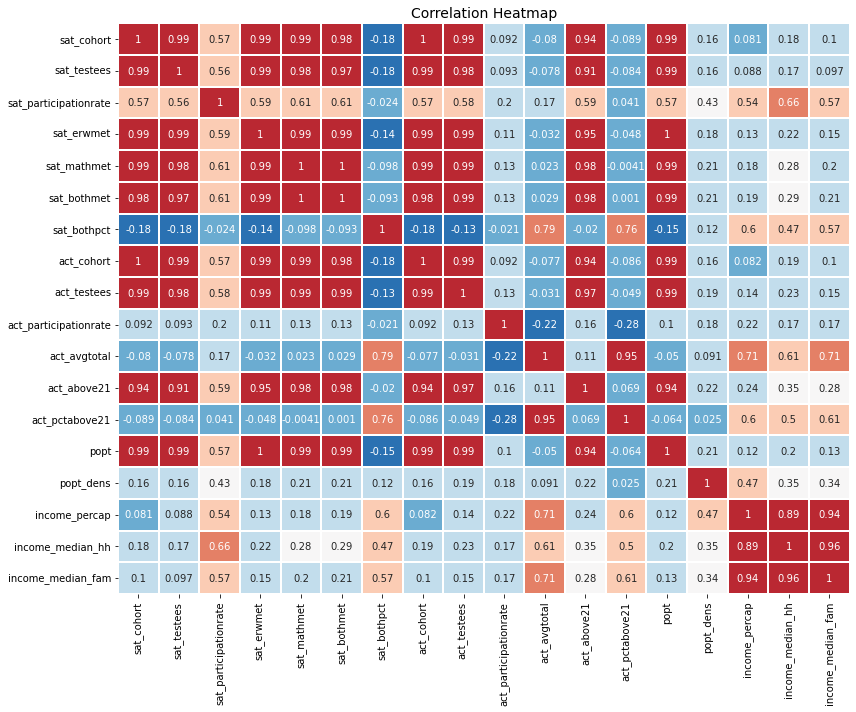

In [46]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    test_df.corr(),
    linewidths=0.1,
    cmap=sns.color_palette("RdBu_r", 7),
    annot=True,
    cbar=False,
)

plt.title("Correlation Heatmap", fontsize=14)

plt.tight_layout()

### Distribution Analysis

* Income per capita does not follow a normal distribution
    * Distribution is right-skewed, with mean higher than median - indicating that most of the counties have a per capital income on the left side of the curve
    * Income is usually right-skewed as it cannot go below 0, but has no limit on maximum income (e.g. billionaires)
    * There seems to be quite a few counties below the 50th percentile (further illustrated in the bar chart below)
    
    
* On first observation, ACT average scores appeared to be normally distributed (as mean and median were almost equal)
    * On further investigation, ACT scores have a bimodal distribution, and is not normally distributed
    * Similarly, SAT scores scoring above the benchmark also follow a bimodal distribution
    * This means that we might assume a bad student to be exceptionally bad, or a good student to be exceptionally good
    * It indicates that there is possibly 2 different types of students 
        * Ones that studied vs ones that did not? 
        * Ones that had better access to education vs those that do not?

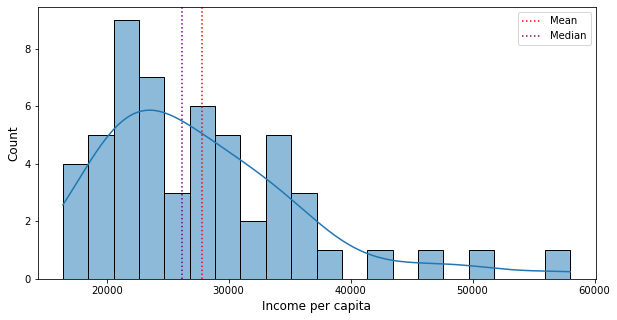

In [47]:
# histogram of income per county

plt.figure(figsize=(10, 5))
sns.histplot(test_df, x="income_percap", bins=20, kde=True)


plt.xlabel("Income per capita", size=12)
plt.ylabel("Count", size=12)
plt.axvline(
    x=test_df.income_percap.mean(), linestyle="dotted", color="red", label="Mean"
)
plt.axvline(x=26190, linestyle="dotted", color="purple", label="Median")
plt.legend(loc="upper right", facecolor="white", fontsize=10)
plt.show()

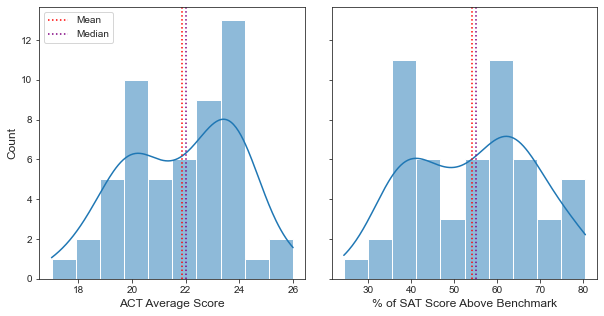

In [48]:
# Histogram of test scores
sns.set_style("ticks")
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(wspace=0.1)

# ACT average scores
sns.histplot(test_df, x="act_avgtotal", bins=10, kde=True, ax=ax[0])
ax[0].set_xlabel("ACT Average Score", size=12)
ax[0].set_ylabel("Count", size=12)
ax[0].axvline(
    x=test_df.act_avgtotal.mean(), linestyle="dotted", color="red", label="Mean"
)
ax[0].axvline(x=22, linestyle="dotted", color="purple", label="Median")
ax[0].legend(loc="upper left", facecolor="white", fontsize=10)


# SAT scores above benchmark
sns.histplot(test_df, x="sat_bothpct", bins=10, kde=True, ax=ax[1])
ax[1].set_xlabel("% of SAT Score Above Benchmark", size=12)
ax[1].set_ylabel("Count", size=12)
ax[1].axvline(
    x=test_df.sat_bothpct.mean(), linestyle="dotted", color="red", label="Mean"
)
ax[1].axvline(x=55.126809, linestyle="dotted", color="purple", label="Median")

plt.savefig('distplot.png', dpi=100)
plt.show()

### Bar chart visual of income per capita vs participation rates 

* Results are varied, some counties with per capita income below 25 percentile actually had high participation rates (e.g. Madera, Fresno, San Bernadino)
* For higher per capita income counties like Nevada and Fresno, participation rates were below the 25 percentile
* There could be other factors at play, for instance compulsory SAT / ACT tests in certain schools 

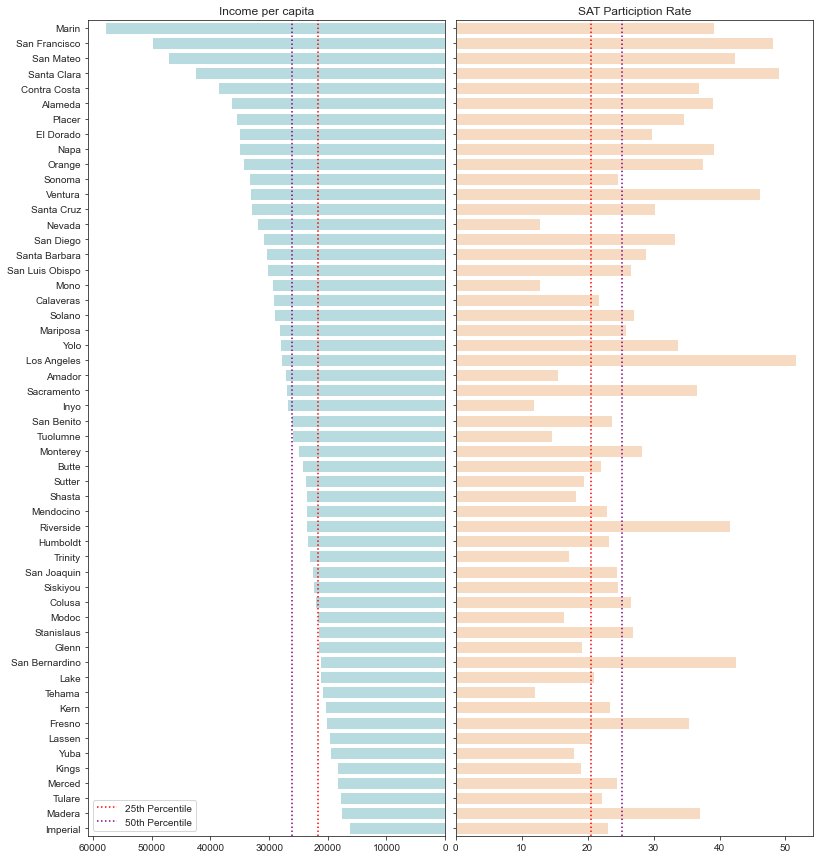

In [49]:
# Plot bar SAT Participation and Income
sns.set_style("ticks")
fig, ax = plt.subplots(1, 2, figsize=(13, 15), sharey=True)
plt.subplots_adjust(wspace=0.03)

# Income per cap
income_percap = test_df.sort_values(by="income_percap", ascending=False)

sns.barplot(
    y="county", x="income_percap", data=income_percap, color="powderblue", ax=ax[0]
)
ax[0].set_title("Income per capita", fontsize=12)
ax[0].set_ylabel("")
ax[0].set_xlabel("")

# add vertical lines for percentiles
ax[0].axvline(x=21754, linestyle="dotted", color="red", label="25th Percentile")
ax[0].axvline(x=26190, linestyle="dotted", color="purple", label="50th Percentile")
ax[0].legend(loc="lower left", facecolor="white", fontsize=10)
ax[0].invert_xaxis()

# SAT Participation
sns.barplot(
    y="county",
    x="sat_participationrate",
    data=income_percap,
    color="peachpuff",
    ax=ax[1],
)
ax[1].set_title("SAT Particiption Rate", fontsize=12)
ax[1].set_ylabel("")
ax[1].set_xlabel("")

# add vertical lines for percentiles
ax[1].axvline(x=20.56, linestyle="dotted", color="red", label="25th Percentile")
ax[1].axvline(x=25.21, linestyle="dotted", color="purple", label="50th Percentile")

plt.show()

### Box Plot Analysis 

* Presence of outliers for ACT participation rate, which could have skewed the mean
* The variation of test scores is larger than that of test participation rates - as seen from the longer boxes 
* None of the 4 variables plotted folllow a normal distribution, and seem to be either right or left skewed

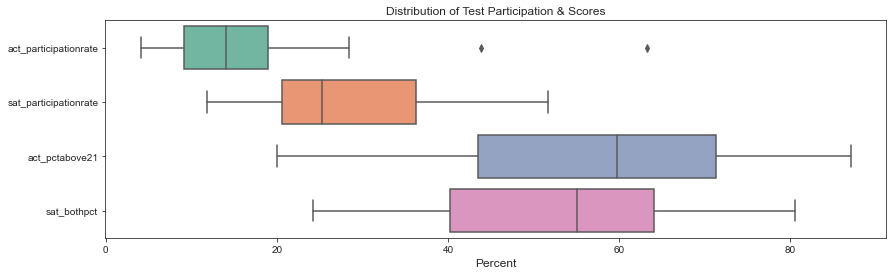

In [50]:
plt.figure(figsize=(14, 4))


a = sns.boxplot(
    data=test_df[
        [
            "act_participationrate",
            "sat_participationrate",
            "act_pctabove21",
            "sat_bothpct",
        ]
    ],
    orient="h",
    palette="Set2",
)

a.axes.set_title("Distribution of Test Participation & Scores", fontsize=12)
a.set_xlabel("Percent", fontsize=12)

plt.show()

### Scatter Plot - Identifying counties for improvement

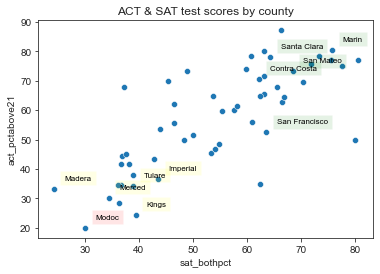

In [51]:
sns.set_style("ticks")
sns.scatterplot(data=test_df, x="sat_bothpct", y="act_pctabove21").set(
    title="ACT & SAT test scores by county"
)

# bottom 5 low income counties
def lowincome(county):
    plt.text(
        x=test_df.sat_bothpct[test_df.county == county] + 2,
        y=test_df.act_pctabove21[test_df.county == county] + 3,
        s=county,
        fontdict=dict(color="black", size=8),
        bbox=dict(facecolor="yellow", alpha=0.1),
    )


lowincome(county="Imperial")
lowincome(county="Tulare")
lowincome(county="Merced")
lowincome(county="Madera")
lowincome(county="Kings")


# Modoc is above the 25 percentile for income but ranks low for performance in both tests
plt.text(
    x=test_df.sat_bothpct[test_df.county == "Modoc"] + 2,
    y=test_df.act_pctabove21[test_df.county == "Modoc"] + 3,
    s="Modoc",
    fontdict=dict(color="black", size=8),
    bbox=dict(facecolor="red", alpha=0.1),
)

# top 5 county's income
def highincome(county):
    plt.text(
        x=test_df.sat_bothpct[test_df.county == county] + 2,
        y=test_df.act_pctabove21[test_df.county == county] + 3,
        s=county,
        fontdict=dict(color="black", size=8),
        bbox=dict(facecolor="green", alpha=0.1),
    )


highincome(county="Marin")
highincome(county="San Francisco")
highincome(county="San Mateo")
highincome(county="Santa Clara")
highincome(county="Contra Costa")

plt.savefig("scatter.png", dpi=200)

plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

<b>Conclusion: </b>
In this study, we have looked at 3 different data sets across the state of California. These data sets looked at ACT and SAT test scores, and family incomes per county. 

From the various analysis, there is a positive correlation between income per capita and test performances. Students in lower income families tend to perform worse compared to their higher income peers. This has also been supported by various research papers, which even states that public/private schools are not the determining factor of success. [(source)](https://www.wbur.org/hereandnow/2018/08/27/public-private-school-family-income-study)

We have also identified certain counties that have poor test performance and are in the lower income bracket. Should resources need to be allocated, these counties should get priority in order to improve education levels.


<b>Recommendations: </b>
There are a few counties that have consistently scored the lowest for both tests - Modoc, San Bernardino, Merced, Madera, Colusa, and Glenn. Of which, Merced and Madera are the counties with the lowest income per capita. The relevant authorities could look into these 2 counties first. 

For starters, it could be possible to look into specific schools or districts in these counties, and identify specific help required. Some immediate remedies could include subsidy for test fees to improve accessibility of education for the lower income. 

In addition, improvements to accessibility of education could also play a big part in improving educational levels during the time of COVID-19 and online learning. The digital divide has widened the educational gap between low and high income families [(source)](https://www.ppic.org/publication/who-is-losing-ground-with-distance-learning-in-california/) and resources to help to even out the playing field.

*Assumptions:* 
- Assume that income per capita does not change drastically over 5 years
- Assume that the effects of  family income is something that affects a student from young, and not only when a student takes their ACT/SAT

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!